In [ ]:
import torch
from torchvision import datasets,transforms
import helper

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

trainset=datasets.FashionMNIST("F_MNIST_data/",download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

testset=datasets.FashionMNIST("F_MNIST_data/",download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

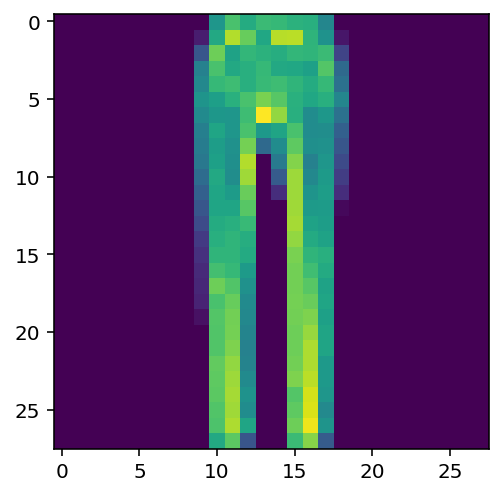

In [ ]:
import matplotlib.pyplot as plt
images,labels=next(iter(trainloader))
plt.imshow(images[0,0,:])


In [ ]:
labels

tensor([1, 7, 3, 4, 5, 3, 7, 2, 0, 1, 0, 2, 1, 9, 1, 0, 7, 6, 9, 1, 8, 5, 3, 9,
        4, 5, 2, 8, 1, 8, 1, 3, 5, 6, 1, 2, 5, 2, 7, 9, 6, 8, 8, 4, 5, 6, 1, 9,
        9, 3, 4, 5, 8, 6, 5, 3, 6, 4, 0, 8, 4, 3, 1, 1])

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format="retina"

import numpy as np
import time

from torch import nn
from torch import optim
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
  def __init__(self,input_size,hidden_sizes,output_size=10):
    super().__init__()
    self.fc1=nn.Linear(input_size,hidden_sizes[0])
    self.fc2=nn.Linear(hidden_sizes[0],hidden_sizes[1])
    self.fc3=nn.Linear(hidden_sizes[1],hidden_sizes[2])
    self.fc4=nn.Linear(hidden_sizes[2],hidden_sizes[3])
    self.fc5=nn.Linear(hidden_sizes[3],output_size)
  def forward(self,x):
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    x=F.relu(x)
    x=self.fc3(x)
    x=F.relu(x)
    x=self.fc4(x)
    x=F.relu(x)
    x=self.fc5(x)
    x=F.softmax(x,dim=1)
    return(x)

input_size=784
hidden_sizes=np.array([160,140,120,80])
output_size=10
model=Network(input_size,hidden_sizes,output_size)
model

Network(
  (fc1): Linear(in_features=784, out_features=160, bias=True)
  (fc2): Linear(in_features=160, out_features=140, bias=True)
  (fc3): Linear(in_features=140, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=80, bias=True)
  (fc5): Linear(in_features=80, out_features=10, bias=True)
)

In [ ]:
model.fc1.bias.data.fill_(0)
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0008,  0.0045, -0.0082,  ...,  0.0042,  0.0224, -0.0002],
        [ 0.0060,  0.0029, -0.0144,  ..., -0.0134,  0.0128,  0.0077],
        [-0.0048,  0.0221, -0.0107,  ..., -0.0009,  0.0020,  0.0070],
        ...,
        [-0.0036, -0.0214,  0.0048,  ...,  0.0110, -0.0072, -0.0058],
        [-0.0120, -0.0034, -0.0089,  ..., -0.0092,  0.0024, -0.0051],
        [-0.0028, -0.0005, -0.0078,  ...,  0.0029, -0.0031, -0.0080]])

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0004)

In [ ]:
images.shape

torch.Size([64, 1, 28, 28])

In [ ]:
def validation(model,testloader,criterion):
  test_loss=0
  test_accuracy=0
  accuracy=0
  for images,labels in testloader:
    images.resize_(images.shape[0],784)
    output=model(images)
    test_loss+=criterion(output,labels).item()
    ps=torch.exp(output)
    equality=(labels.data==ps.max(dim=1)[1])
    test_accuracy+=equality.type(torch.FloatTensor).mean()
  return(test_loss,test_accuracy)

In [ ]:
epochs=5
steps=0
running_loss=0
print_every=40
for e in range(epochs):
  model.train()
  for images,labels in trainloader:
    steps+=1
    images.resize_(images.size()[0],784)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

    if steps % print_every==0:
      model.eval()

      test_loss,test_accuracy=validation(model,testloader,criterion)
      print("Epoch: {}/{}".format(e+1,epochs),
            "Training loss: {:.3f}..".format(running_loss/print_every),
            "Test Loss: {:.3f}".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(test_accuracy/len(testloader)))
      running_loss=0
      model.train()

Epoch: 1/5 Training loss: 2.233.. Test Loss: 2.100 Test Accuracy: 0.387
Epoch: 1/5 Training loss: 1.964.. Test Loss: 1.875 Test Accuracy: 0.591
Epoch: 1/5 Training loss: 1.821.. Test Loss: 1.775 Test Accuracy: 0.710
Epoch: 1/5 Training loss: 1.757.. Test Loss: 1.753 Test Accuracy: 0.720
Epoch: 1/5 Training loss: 1.750.. Test Loss: 1.734 Test Accuracy: 0.734
Epoch: 1/5 Training loss: 1.733.. Test Loss: 1.737 Test Accuracy: 0.728
Epoch: 1/5 Training loss: 1.730.. Test Loss: 1.720 Test Accuracy: 0.746
Epoch: 1/5 Training loss: 1.702.. Test Loss: 1.712 Test Accuracy: 0.756
Epoch: 1/5 Training loss: 1.697.. Test Loss: 1.709 Test Accuracy: 0.756
Epoch: 1/5 Training loss: 1.719.. Test Loss: 1.702 Test Accuracy: 0.762
Epoch: 1/5 Training loss: 1.698.. Test Loss: 1.723 Test Accuracy: 0.740
Epoch: 1/5 Training loss: 1.699.. Test Loss: 1.698 Test Accuracy: 0.764
Epoch: 1/5 Training loss: 1.700.. Test Loss: 1.694 Test Accuracy: 0.769
Epoch: 1/5 Training loss: 1.681.. Test Loss: 1.694 Test Accuracy

7 tensor(7)


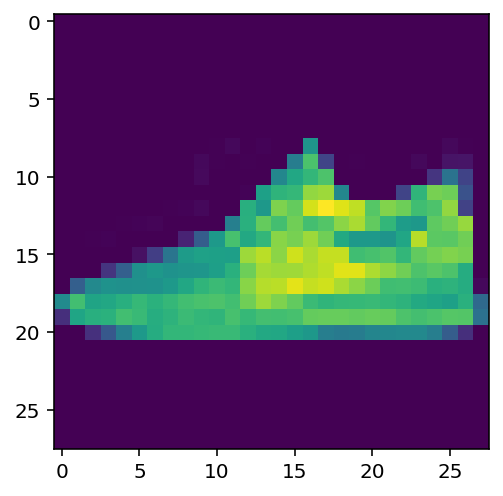

In [ ]:
model.eval()
dataiter=iter(testloader)
images,labels=dataiter.next()
img=images[0,0,:]
img=img.view(1,784)
with torch.no_grad():
  output=model.forward(img)
ps=torch.exp(output)
print(np.argmax(ps.numpy()),labels[0])
plt.imshow(images[0].numpy().squeeze())